# Easy tour of basic statistics using the "R" Programming Language

##JKGL6GEV Prepared by Eswar Raman in February 2016

Data represents measurements made within a specific context. And these measurements could be made of many attributes of  a process, a group of people or of stellar bodies or of biological mechanisms and so on. For the purpose of this discussion think of the specific units being measured as rows in a spreadsheet and the particular attributes of each of these units being measured as columns in the spreadsheet.

I have used the R language provided courtesy of the R Development Core Team (2008). R: A language and environment for
statistical computing. R Foundation for Statistical Computing,   Vienna, Austria. ISBN 3-900051-07-0, URL http://www.R-project.org.


## Basics of Data exploration

Attributes can be considered to be of two differing kinds, if they group the units they are considered 'categorical' and if the attributes take numerical values they are 'quantitative' variables.Once we have the data, we need to start with a basic level of understanding of the data, how is the data grouped, what is a representative set of values for a specific attribute or how does the value of an attribute change by the category or group within the data.  

### Plot Data

Visual exploration of the data along with summaries of the data helps us find any overarching patterns as well as exceptions to patterns.

####Histograms

A histogram breaks up the range of values listed for a specific attribute or variable and groups these into discrete classes. The idea is to then display the actual count or the percent of the whole that is contained in each of the classes. Some of the best practices in plotting a histogram include determining the right number of classes to group the values into and ensuring that in a given plot, the classes are of equal width.

##### Start by loading useful libraries for visualization such as lattice and ggplot2

In [14]:
library(ggplot2)
library(lattice)

Warning message:
: package 'ggplot2' was built under R version 3.2.3

###### One of the elementary steps that is required is to request visuals in-line, this definitely has to be one of the advantages of using the notebook

In [15]:
options(jupyter.plot_mimetypes = 'image/png')

### Introduction to the data set
#### I have selected the 'wiki4HE Data Set' from the UCI Machine Learning Repository.  This data set was provided courtesy of Meseguer, A., Aibar, E., LladÃ³s, J., MinguillÃ³n, J., Lerga, M. (2015). â€œFactors that influence the teaching use of Wikipedia in Higher Educationâ€. JASIST, Journal of the Association for Information Science and Technology. ISSN: 2330-1635. doi: 10.1002/asi.23488. 
Per sources listed above, this data set is a result of the study of the " Ongoing research on university faculty perceptions and practices of using Wikipedia as a teaching resource" .

In [2]:
# Read the data set from the web page, it is a ';' delimited file.
wiki=read.csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00334/wiki4HE.csv',sep=';')

In [82]:
# A quick overview of our data set
str(wiki)

'data.frame':	913 obs. of  53 variables:
 $ AGE           : int  40 42 37 40 51 47 43 55 54 50 ...
 $ GENDER        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DOMAIN        : Factor w/ 7 levels "?","1","2","3",..: 3 6 5 5 7 5 5 7 2 5 ...
 $ PhD           : int  1 1 1 0 0 0 0 0 1 1 ...
 $ YEARSEXP      : Factor w/ 37 levels "?","0","1","10",..: 8 12 7 7 36 11 5 6 8 20 ...
 $ UNIVERSITY    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ UOC_POSITION  : Factor w/ 7 levels "?","1","2","3",..: 3 3 4 4 4 4 4 4 3 3 ...
 $ OTHER_POSITION: Factor w/ 3 levels "?","1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ OTHERSTATUS   : Factor w/ 8 levels "?","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ USERWIKI      : Factor w/ 3 levels "?","0","1": 2 2 2 2 3 2 2 2 2 2 ...
 $ PU1           : Factor w/ 6 levels "?","1","2","3",..: 5 3 3 4 5 3 5 5 5 5 ...
 $ PU2           : Factor w/ 6 levels "?","1","2","3",..: 5 4 3 4 4 3 5 5 5 5 ...
 $ PU3           : Factor w/ 6 levels "?","1","2","3",..: 4 4 3 5 6 4 5 6 6 5 ...
 $ PEU1          : Factor w

####Here is an example of data exploration, we will plot the categorical variable 'Position held'.

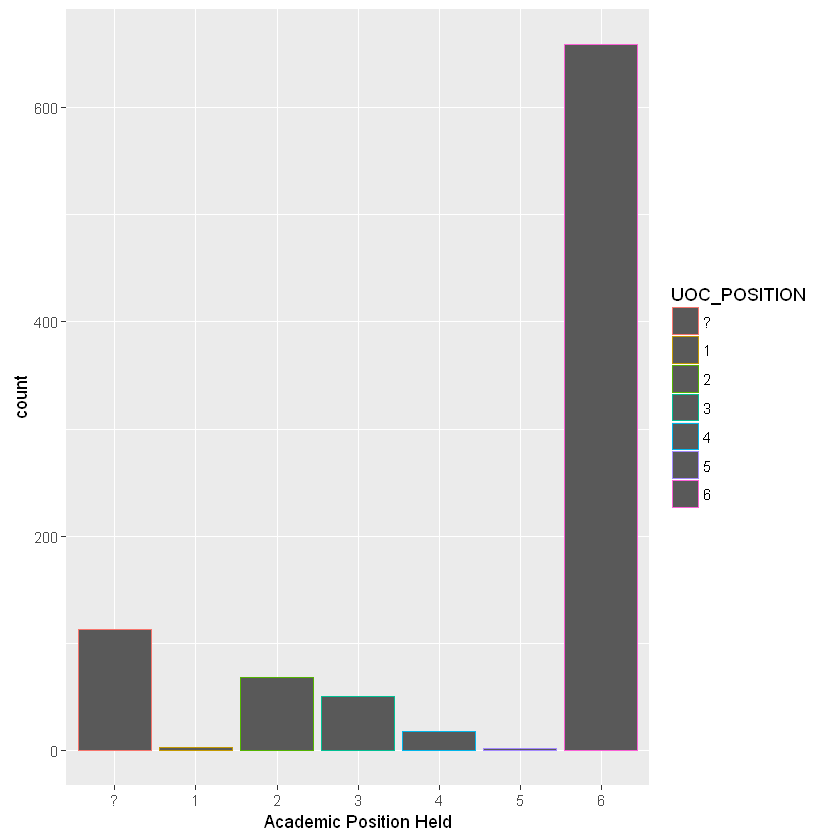

In [49]:
qplot(x = UOC_POSITION, color = UOC_POSITION,xlab='Academic Position Held', data = wiki, geom = "bar")

#### It is not very clear from the bar chart as to which positions are being visualized, so Let us rename the UOC_POSITION to better visualize the categories. The documentation for the data set explains the categories for us, so we willl use the documentation to  map our categories.
1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct
An example of a simple vector is shown below
> a<-factor(c(1,2,2,1,3,4,2,1,NA,3,4,1,NA))
> a
 [1] 1    2    2    1    3    4    2    1    <NA> 3    4    1    <NA>
Levels: 1 2 3 4
> levels(a)<-list(Unknown='<NA>',Alpha = '1',Beta='2',Gamma='3',Delta='4')
> a
 [1] Alpha Beta  Beta  Alpha Gamma Delta Beta  Alpha <NA>  Gamma Delta Alpha
[13] <NA> 
Levels: Unknown Alpha Beta Gamma Delta

In [3]:
levels(wiki$UOC_POSITION)=list(Professor='1',Associate='2',Assistant='3',Lecturer='4',Instructor='5',Adjunct='6',Unknown='?')

In [4]:
levels(wiki$PU1)=list(Never='1',Strongly_Disagree='2',Neutral='3',Strongly_Agree='4',Always='5',Unknown='?')
levels(wiki$PU2)=list(Never='1',Strongly_Disagree='2',Neutral='3',Strongly_Agree='4',Always='5',Unknown='?')
levels(wiki$PU3)=list(Never='1',Strongly_Disagree='2',Neutral='3',Strongly_Agree='4',Always='5',Unknown='?')

#### Having mapped the category descriptions to the levels we are in a better position to prepare the bar chart that shows us the distribution of interviewees by position held at the university.

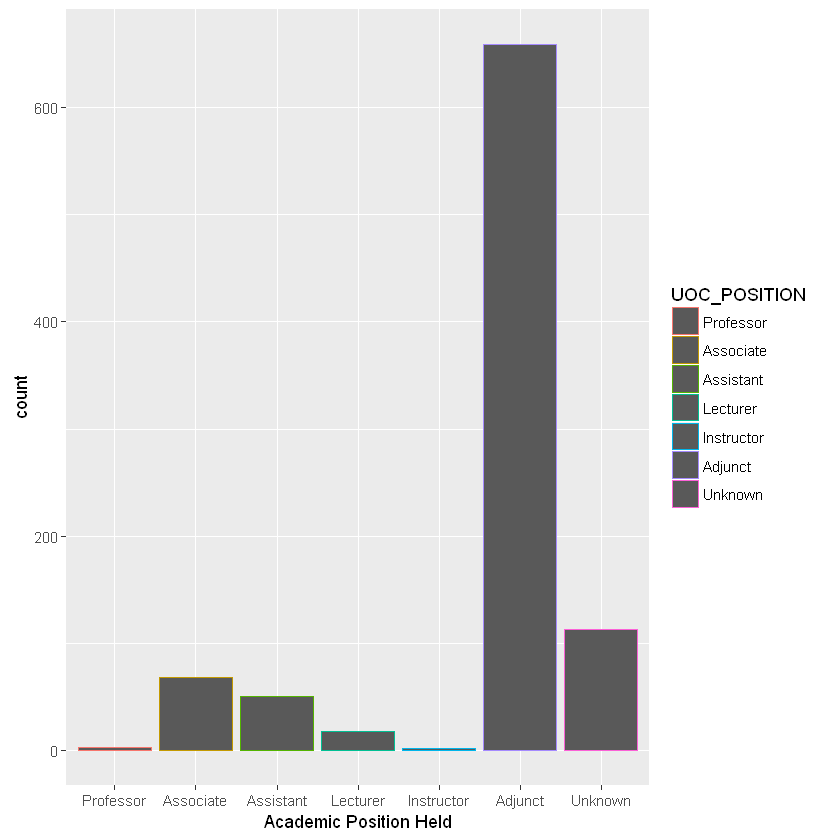

In [84]:
qplot(x = UOC_POSITION, color = UOC_POSITION,xlab='Academic Position Held', data = wiki, geom = "bar")

#### The above table piqued my curiosity further, so I decided to get contingency tables for position by attribute 'PU1' which stands for the perceived ease with which students can develop new skills as a result of using the wikipedia. 

In [89]:
table(wiki$UOC_POSITION,wiki$PU1)

            
             Never Strongly_Disagree Neutral Strongly_Agree Always Unknown
  Professor      0                 1       0              2      0       0
  Associate      2                16      23             21      4       2
  Assistant      1                11      20             15      3       0
  Lecturer       1                 7       4              1      5       0
  Instructor     0                 1       0              1      0       0
  Adjunct       24               163     237            169     62       4
  Unknown        7                17      46             30     12       1

#### I was also interested in the general distribution of the interviewees as I could hypothesize that interviewees holding junior positions for the most part had to be younger and therefore more open to the idea of using wikis for education. 
It is important to note that a good number of respondents did not quote their position. We can perhaps make an educated guess as to their positions by looking at their votes , just perhaps as there is no conclusive evidence for that in this data set.

In [75]:
summary(wiki$UOC_POSITION)

Professor  Associate  Assistant   Lecturer Instructor    Adjunct    Unknown 
         3         68         50         18          2        659          0 
      NA's 
       113

#### As a note for would be data scientists or analysts, the length function includes the 'na's in any listing so you have to explicitly remove this from your subsets.

In [80]:
length(wiki$UOC_POSITION[wiki$UOC_POSITION =='Professor'])
length(wiki$UOC_POSITION[wiki$UOC_POSITION =='Professor' & !is.na(wiki$UOC_POSITION)])
length(wiki$UOC_POSITION[wiki$UOC_POSITION =='Adjunct' & !is.na(wiki$UOC_POSITION)])
length(wiki$UOC_POSITION[wiki$UOC_POSITION =='NA'])
length(wiki)
str(wiki)

[1] 116

[1] 3

[1] 659

[1] 113

[1] 53

'data.frame':	913 obs. of  53 variables:
 $ AGE           : int  40 42 37 40 51 47 43 55 54 50 ...
 $ GENDER        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DOMAIN        : Factor w/ 7 levels "?","1","2","3",..: 3 6 5 5 7 5 5 7 2 5 ...
 $ PhD           : int  1 1 1 0 0 0 0 0 1 1 ...
 $ YEARSEXP      : Factor w/ 37 levels "?","0","1","10",..: 8 12 7 7 36 11 5 6 8 20 ...
 $ UNIVERSITY    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ UOC_POSITION  : Factor w/ 7 levels "Professor","Associate",..: 2 2 3 3 3 3 3 3 2 2 ...
 $ OTHER_POSITION: Factor w/ 3 levels "?","1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ OTHERSTATUS   : Factor w/ 8 levels "?","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ USERWIKI      : Factor w/ 3 levels "?","0","1": 2 2 2 2 3 2 2 2 2 2 ...
 $ PU1           : Factor w/ 6 levels "?","1","2","3",..: 5 3 3 4 5 3 5 5 5 5 ...
 $ PU2           : Factor w/ 6 levels "?","1","2","3",..: 5 4 3 4 4 3 5 5 5 5 ...
 $ PU3           : Factor w/ 6 levels "?","1","2","3",..: 4 4 3 5 6 4 5 6 6 5 ...
 $ PEU1          : 

#### At this point, I decided to have a closer look at the distribution of the PU1 recommendations by position. For the positions that have reported in numbers, the distribution is pretty even across the PU1 spectrum.This does not support any hypothesis on a younger population holding junior positions in general and therefore being more open to the idea of wikis.

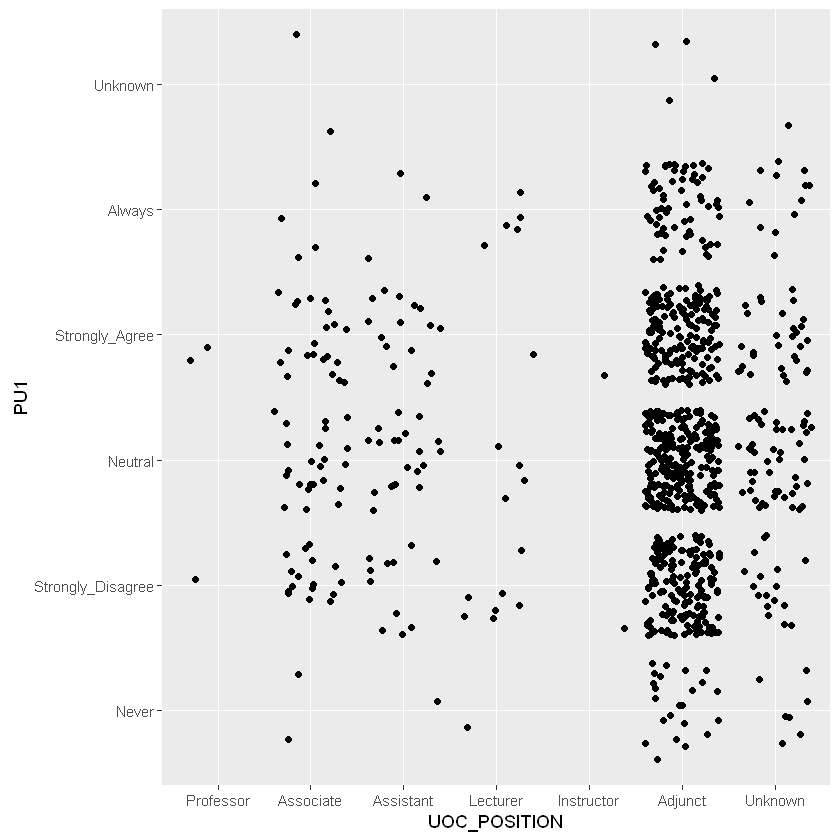

In [130]:
ggplot(data=wiki,aes(x=UOC_POSITION,y=PU1))+geom_jitter()

#### Not satisfied with a one dimensional view such as the above I decided to visualize conditional distributions for which I have used visualization functions from the lattice package. The visualization shown below, definitely shows the almost even distribution across the PU1 spectrum. The strong positives and negatives balance out and the neutral ends up being the average.

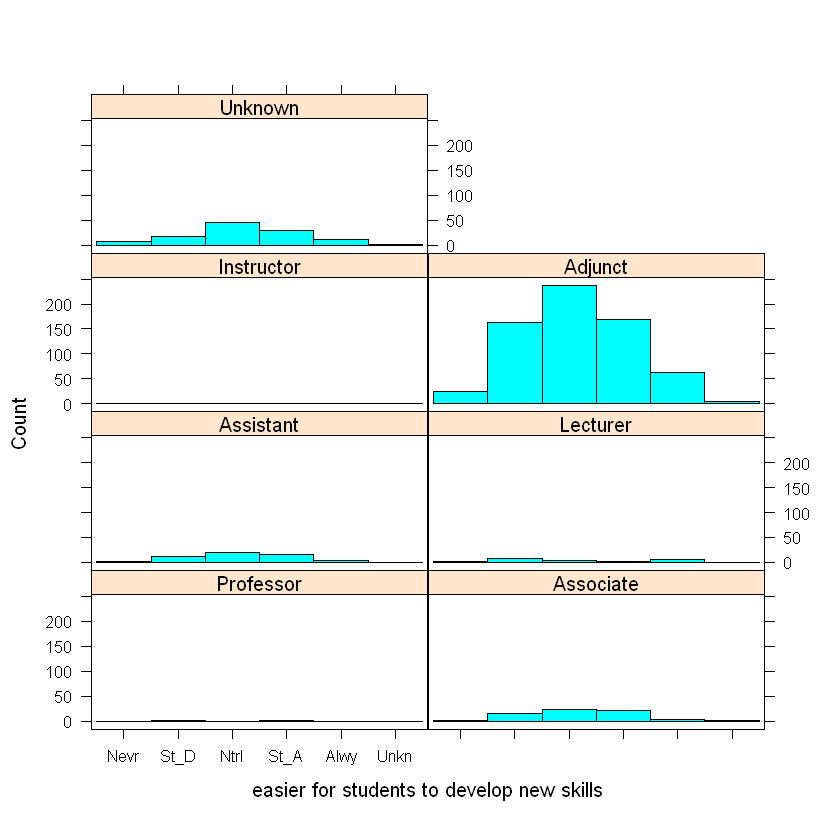

In [132]:
histogram(~PU1|UOC_POSITION,data=wiki,xlab="easier for students to develop new skills",cex=0.1,aspect=0.4,type="count",layout=c(2,4),scales=list(abbreviate=TRUE))

#### The histograms shown below plot the 'wiki is iseful for teaching' variable.

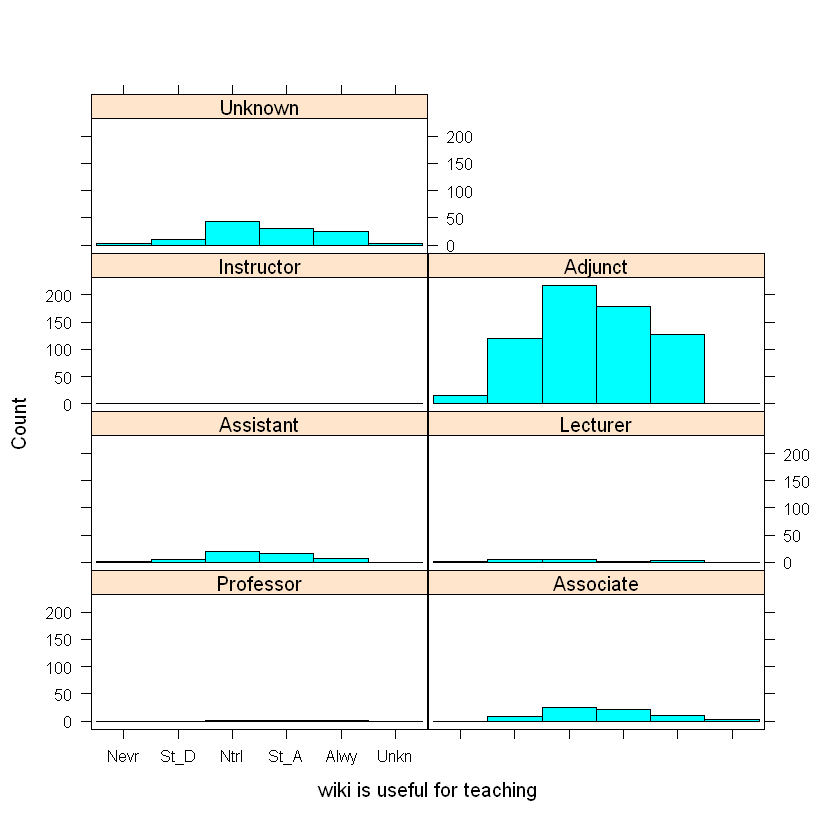

In [131]:
histogram(~PU3|UOC_POSITION,data=wiki,xlab="wiki is useful for teaching",cex=0.1,aspect=0.4,type="count",layout=c(2,4),scales=list(abbreviate=TRUE))

#### The next part involves the possibility of age being a factor in the advocacy for wikis. But before we get to distribution by age, we will tabulate the conditional distribution of PU1 by 'Adjunct' interviewees.

In [12]:
table(wiki$PU1[wiki$UOC_POSITION =='Adjunct' & !is.na(wiki$UOC_POSITION)])


            Never Strongly_Disagree           Neutral    Strongly_Agree 
               24               163               237               169 
           Always           Unknown 
               62                 4 

#### We will create a conditional distribution of 'Adjunct' interviewees by age next. As you will notice it is not very useful from a big picture view.

In [19]:
table(wiki$PU1[wiki$UOC_POSITION =='Adjunct' & !is.na(wiki$UOC_POSITION)],wiki$AGE[wiki$UOC_POSITION =='Adjunct' & !is.na(wiki$UOC_POSITION)])

                   
                    23 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
  Never              0  0  0  1  1  0  0  1  0  2  1  0  0  0  0  1  0  1  2  0
  Strongly_Disagree  1  1  0  1  0  1  2  4  4 11  5  5  4  4  6  5  6  7 16 12
  Neutral            0  0  1  0  3  1  2  7  5 13 11  9 12 10  9 12 13 10  7 11
  Strongly_Agree     0  1  0  0  3  2  3  3  5  3  5  9  8  3 12 13  6 10  8  9
  Always             0  0  0  0  1  2  0  1  2  2  3  3  2  4  3  5  1  1  5  2
  Unknown            0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  1
                   
                    44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64
  Never              0  0  2  1  2  1  4  0  2  0  1  0  1  0  0  0  0  0  0  0
  Strongly_Disagree  9  8  6  6  6  7  4  1  4  1  2  0  5  2  2  1  1  1  1  0
  Neutral            6 14 11 11  8  8  6  8  5  7  2  4  2  0  2  1  1  0  2  1
  Strongly_Agree     9 10  7  4  7  7  6  2  4  1  2  1  1  3  0  0  0  1  1  0


#### To make the conditional distribution from above more useful, I will group the ages into buckets.I will add a column with the age bracket assignment and then use the new column to create the conditional distribution.

In [25]:
#> b<-seq(23,69,by=5)
#> b
# [1] 23 28 33 38 43 48 53 58 63 68
#> c<-seq(23,69,by=1)
#> c
# [1] 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
#[26] 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69


age_breaks<-seq(23,69,by=5)
age_brackets<-cut(wiki$AGE,breaks=seq(23,69,by=5))
wiki['age_brackets']=cut(wiki$AGE,breaks=seq(23,69,by=5))


In [26]:
str(wiki)

'data.frame':	913 obs. of  54 variables:
 $ AGE           : int  40 42 37 40 51 47 43 55 54 50 ...
 $ GENDER        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DOMAIN        : Factor w/ 7 levels "?","1","2","3",..: 3 6 5 5 7 5 5 7 2 5 ...
 $ PhD           : int  1 1 1 0 0 0 0 0 1 1 ...
 $ YEARSEXP      : Factor w/ 37 levels "?","0","1","10",..: 8 12 7 7 36 11 5 6 8 20 ...
 $ UNIVERSITY    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ UOC_POSITION  : Factor w/ 7 levels "Professor","Associate",..: 2 2 3 3 3 3 3 3 2 2 ...
 $ OTHER_POSITION: Factor w/ 3 levels "?","1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ OTHERSTATUS   : Factor w/ 8 levels "?","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ USERWIKI      : Factor w/ 3 levels "?","0","1": 2 2 2 2 3 2 2 2 2 2 ...
 $ PU1           : Factor w/ 6 levels "Never","Strongly_Disagree",..: 4 2 2 3 4 2 4 4 4 4 ...
 $ PU2           : Factor w/ 6 levels "Never","Strongly_Disagree",..: 4 3 2 3 3 2 4 4 4 4 ...
 $ PU3           : Factor w/ 6 levels "Never","Strongly_Disagree",..: 3 3 2 4

#### At this point, we are ready to create the conditional distribution and this time I will plot the histogram directly. As we can see there is no evident bias in the lower age groups, for the most part they are neutral and we have a distribution approaching the normal. So it would seem like the group is not particularly favorably disposed to the use of wiki by students.

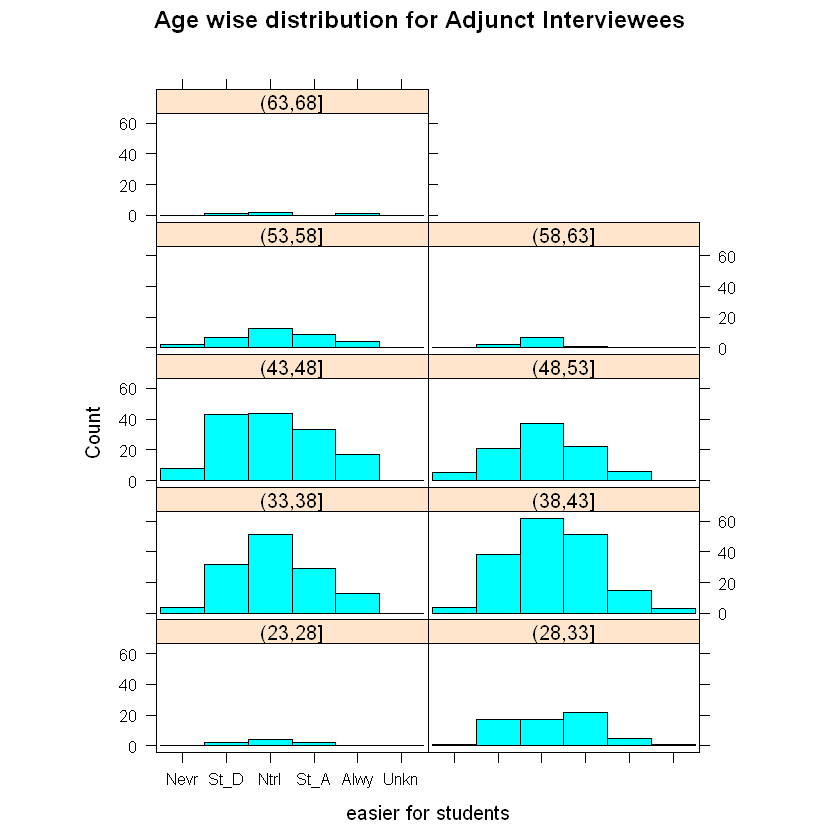

In [29]:
histogram(~wiki$PU1[wiki$UOC_POSITION =='Adjunct' & !is.na(wiki$UOC_POSITION)]|age_brackets,main="Age wise distribution for Adjunct Interviewees",data=wiki,xlab="easier for students",cex=0.1,aspect=0.4,type="count",scales=list(abbreviate=TRUE))

####Footnotes
1) R language provided courtesy of the R Development Core Team (2008). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. ISBN 3-900051-07-0, URL http://www.R-project.org.
2)'wiki4HE Data Set' from the UCI Machine Learning Repository.  This data set was provided courtesy of Meseguer, A., Aibar, E., LladÃ³s, J., MinguillÃ³n, J., Lerga, M. (2015). â€œFactors that influence the teaching use of Wikipedia in Higher Educationâ€. JASIST, Journal of the Association for Information Science and Technology. ISSN: 2330-1635. doi: 10.1002/asi.23488.¶
3)Copyright © 2016 by Eswar Raman
